# Topic matching between BERTopic and PAM
### Coded by Sandrin Raphael Hunkeler (18-253-815)

## 1. Match Topic by Top 10 Words

In [104]:
def read_topics(file_path):
    topics = []
    with open(file_path, 'r') as file:
        lines = file.readlines()

    topic = None
    words = []
    for line in lines:
        line = line.strip()
        if line.startswith('TOPIC'):
            if topic is not None:
                topics.append({"topic": topic, "words": words})
                words = []
            topic = line
        elif line.startswith('Words:'):
            continue
        elif line.startswith('[') and line.endswith(']'):
            words = eval(line)

    if topic is not None and len(words) > 0:
        topics.append({"topic": topic, "words": words})
    return topics

def compare_topics(bert_dict, pam_dict):
    matching_topics = []

    for bert_topic in bert_dict:
        bert_topic_num = bert_topic['topic']
        bert_words = bert_topic['words']

        for pam_topic in pam_dict:
            pam_topic_num = pam_topic['topic']
            pam_words = pam_topic['words']

            matching_words = []
            for word in pam_words:
                if word in " ".join(bert_words):
                    matching_words.append(word)

            for word in bert_words:
                if word in " ".join(pam_words):
                    matching_words.append(word)

            if len(matching_words) >1:
                matching_topics.append((bert_topic_num, pam_topic_num, list(set(matching_words))))

    return matching_topics

BERTopic_file = "../diagramOutput/topic_words_Bert.txt"
PAM_file = "../diagramOutput/topic_words_PAM.txt"

bert_dict = read_topics(BERTopic_file)
pam_dict = read_topics(PAM_file)

matching_topics = compare_topics(bert_dict, pam_dict)

for bert_topic, pam_topic, common_words in sorted(matching_topics, key=lambda x: len(x[2])):
    print(f"BERT: {bert_topic.split()[1]} = {', '.join(bert_dict[int(bert_topic.split()[1])]['words'])}")
    print(f"PAM:  {pam_topic.split()[1]} = {', '.join(pam_dict[int(pam_topic.split()[1])]['words'])}")
    print(f"{len(common_words)} matches = {', '.join(common_words)}")
    print("==========================")


BERT: 0 = majesty, crown, government, majesty government, king, state, minister, make, subject, queen
PAM:  0 = bill, noble, question, take, present, make, committee, give, learn, measure
1 matches = make
BERT: 0 = majesty, crown, government, majesty government, king, state, minister, make, subject, queen
PAM:  8 = secretary, th, officer, ship, ask, copy, state, move, college, address
1 matches = state
BERT: 0 = majesty, crown, government, majesty government, king, state, minister, make, subject, queen
PAM:  9 = school, board, child, make, work, bill, ask, education, committee, regard
1 matches = make
BERT: 0 = majesty, crown, government, majesty government, king, state, minister, make, subject, queen
PAM:  13 = grant, sum, pay, crown, amount, church, revenue, property, public, act
1 matches = crown
BERT: 0 = majesty, crown, government, majesty government, king, state, minister, make, subject, queen
PAM:  14 = court, county, bench, queen, writ, chief, sheriff, th, ireland, judge
1 matc

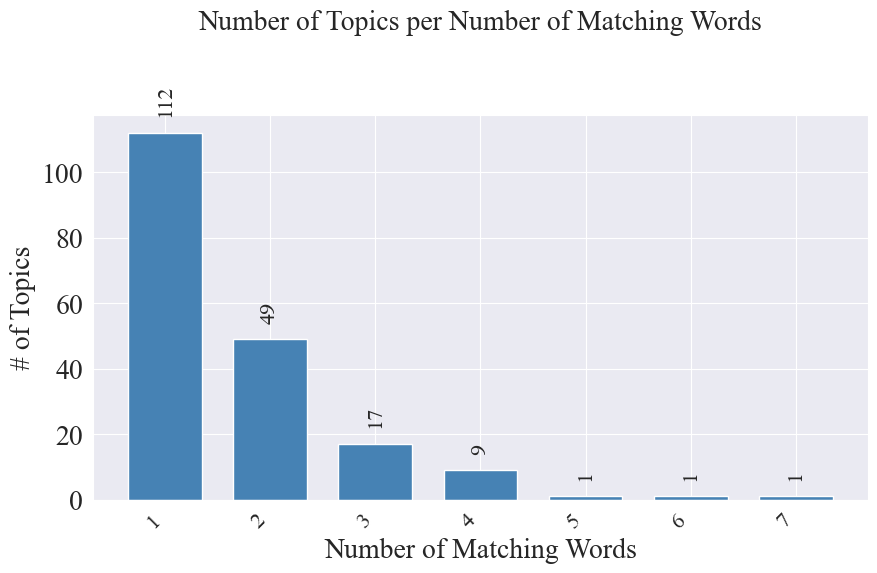

In [101]:
import matplotlib.pyplot as plt
topics_count = {}
for bert_topic, pam_topic, common_words in matching_topics:
    num_matching_words = len(common_words)
    if num_matching_words in topics_count:
        topics_count[num_matching_words] += 1
    else:
        topics_count[num_matching_words] = 1

sorted_topics_count = sorted(topics_count.items())
x = [topic_count[0] for topic_count in sorted_topics_count]
y = [topic_count[1] for topic_count in sorted_topics_count]

plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(x, y, width=0.7, color='steelblue')
ax.set_title("Number of Topics per Number of Matching Words", fontsize=20, y=1.2)
ax.set_ylabel("# of Topics", fontsize=20)
ax.set_xlabel("Number of Matching Words", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45, ha='right', fontsize=16)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, height, ha='center', va='bottom', rotation=90, fontsize=16)

plt.savefig("../diagramOutput/NumberOfTopicsPerMatchingWords.png", dpi=300, bbox_inches='tight')
plt.show()